In [1]:
"""This notebook is to train random forest on wheat seeds prediction dataset"""

'This notebook is to train random forest on wheat seeds prediction dataset'

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('../datasets/Seed_Data.csv')

In [4]:
data.head()

,Area,Perimeter,Compactness,length_of_kernel,width_of_kernel,asymetric_coef,length_of_kernel_groove,target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [5]:
data.columns

Index(['Area', 'Perimeter', 'Compactness', 'length_of_kernel',
       'width_of_kernel', 'asymetric_coef', 'length_of_kernel_groove',
       'target'],
      dtype='object')

In [7]:
data.shape

(210, 8)

In [8]:
data = data.dropna()

print(data.shape)

(210, 8)


In [9]:
X = data.drop(columns=["target"])

y = data["target"]

print(X.shape,y.shape)

(210, 7) (210,)


In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(
    X,y,test_size = 0.2,random_state=42,stratify = y
)

In [14]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    max_depth = None,
    random_state = 42,
)

In [15]:
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [16]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9047619047619048

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.71      0.83        14
           1       0.93      1.00      0.97        14
           2       0.82      1.00      0.90        14

    accuracy                           0.90        42
   macro avg       0.92      0.90      0.90        42
weighted avg       0.92      0.90      0.90        42



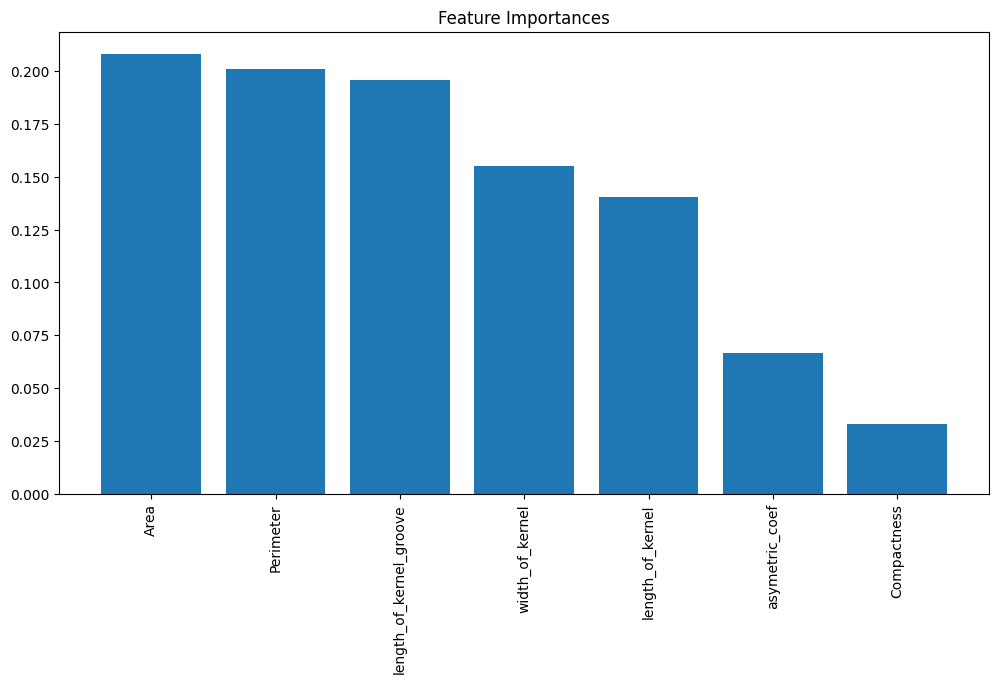

In [17]:
import matplotlib.pyplot as plt
import numpy as np

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

# Take top k features (max = number of features)
k = min(20, len(importances))

plt.figure(figsize=(12,6))
plt.title("Feature Importances")
plt.bar(range(k), importances[indices[:k]], align="center")
plt.xticks(range(k), X.columns[indices[:k]], rotation=90)
plt.show()


In [18]:
# Take first 5 rows from X_test
sample = X_test.head()

# Predict on them
predictions = rf.predict(sample)

print("Predictions:", predictions.tolist())
print("Actual:", y_test.head().tolist())


Predictions: [0, 2, 1, 2, 1]
Actual: [0, 2, 1, 2, 1]


In [19]:
import joblib

# Save trained model
joblib.dump(rf, "random_Seeds_model.pkl")
print("✅ Model saved as random_Seeds_model.pkl")

✅ Model saved as random_Seeds_model.pkl
